In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Exploritory Data Analysis

The is found on kaggle, it's a data set of student grades. Specifically for three subjects math, reading, and writing. Other features are  gender,race/ethnicity,parental level of education, lunch status, test preparation course. 

After reading the csv (dataset) we will filter the dataframe into subsets to see various graphs and exact vital informations. |

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

data.shape # size of the data

(1000, 8)

In [3]:
data.head() # seeing how the data looks.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.isnull().sum() # seeing of there is an missing values. 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

After seeing that there is no missing values, and with seeing a sample of the data, we can confidently begin to draw graphs.

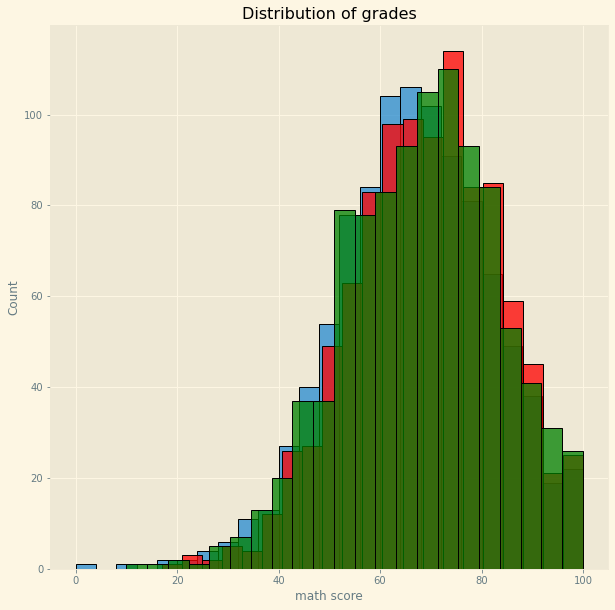

In [5]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(10,10))
    plt.title('Distribution of grades')
    sns.histplot(data['math score'])
    sns.histplot(data['reading score'], color = 'red')
    sns.histplot(data['writing score'], color = 'green')    

 We can see that the distribution of the three subject overlap alot. However, this isnt enough to see how the students are performing. 

In [6]:
data.describe() # quick statistics of the dataset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Distributions 

The following graph is about each feature of the dataset and see how many students are affected by it. 

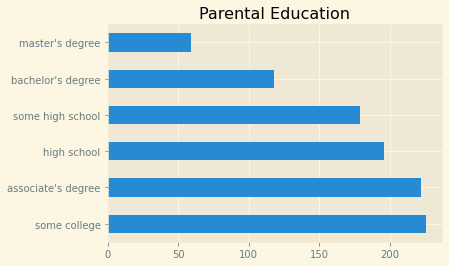

In [7]:
with plt.style.context('Solarize_Light2'):
    plt.title('Parental Education')
    data['parental level of education'].value_counts().plot(kind='barh')

Parental Education - an important influence on a how a student's outlook. We can see that there are more parents without a bachelor's degree or better, than with one. 

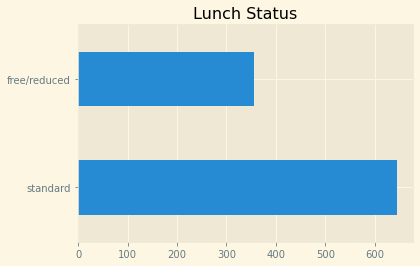

In [8]:
with plt.style.context('Solarize_Light2'):
    plt.title('Lunch Status')
    data['lunch'].value_counts().plot(kind='barh')

Free/reduce lunch are students that are part of a program in the school. It's subsidized by the government to ensure that schools don't lose money, and ensure students have something to eat. 

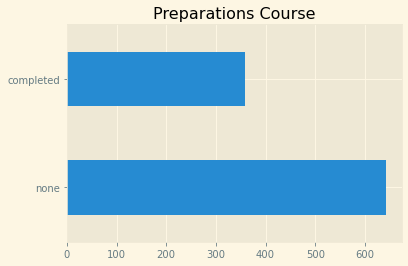

In [9]:
with plt.style.context('Solarize_Light2'):
    plt.title('Preparations Course')
    data['test preparation course'].value_counts().plot(kind='barh')

The preparations course is to help the student perform well in their respective subject.

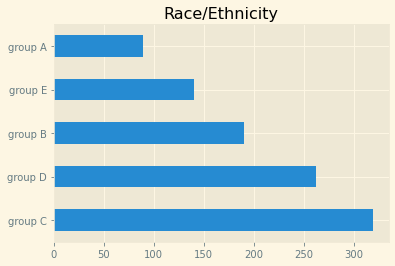

In [10]:
with plt.style.context('Solarize_Light2'):
    plt.title('Race/Ethnicity')
    data['race/ethnicity'].value_counts().plot(kind='barh')

With the given distribution of their Ethnicity, we will see if there is an ethnicity that  performs better in the a later graph.

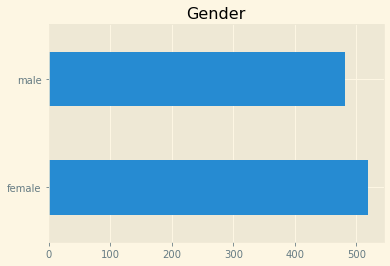

In [11]:
with plt.style.context('Solarize_Light2'):
    plt.title('Gender')
    data['gender'].value_counts().plot(kind='barh')

With seeing a basic graphs of each feature like genders, ethicity, grades, etc. We can begin to group different features and extract more information. We will begin to see how student perform depending on their lunch status.

In [12]:
data.set_index('lunch',inplace=True) # desired column needs to be the index.

freelunch = data.filter(like = 'free/reduced', axis=0) # first filter for free/reduce lunch

#We drop other columns and aggregate the mean of grades
freelunch = freelunch.drop(columns= ['gender','race/ethnicity', 'parental level of education','test preparation course'])
freelunchgrade = freelunch.agg({'math score': ['mean'], 'reading score': ['mean'],'writing score':['mean']})


# The seconds filter for standard lunch, followed by the same drops and aggregation.
standardlunch = data.filter(like = 'standard', axis=0)
standardlunch = standardlunch.drop(columns= ['gender','race/ethnicity', 'parental level of education','test preparation course'])
standardlunchgrade = standardlunch.agg({'math score': ['mean'], 'reading score': ['mean'],'writing score':['mean']})


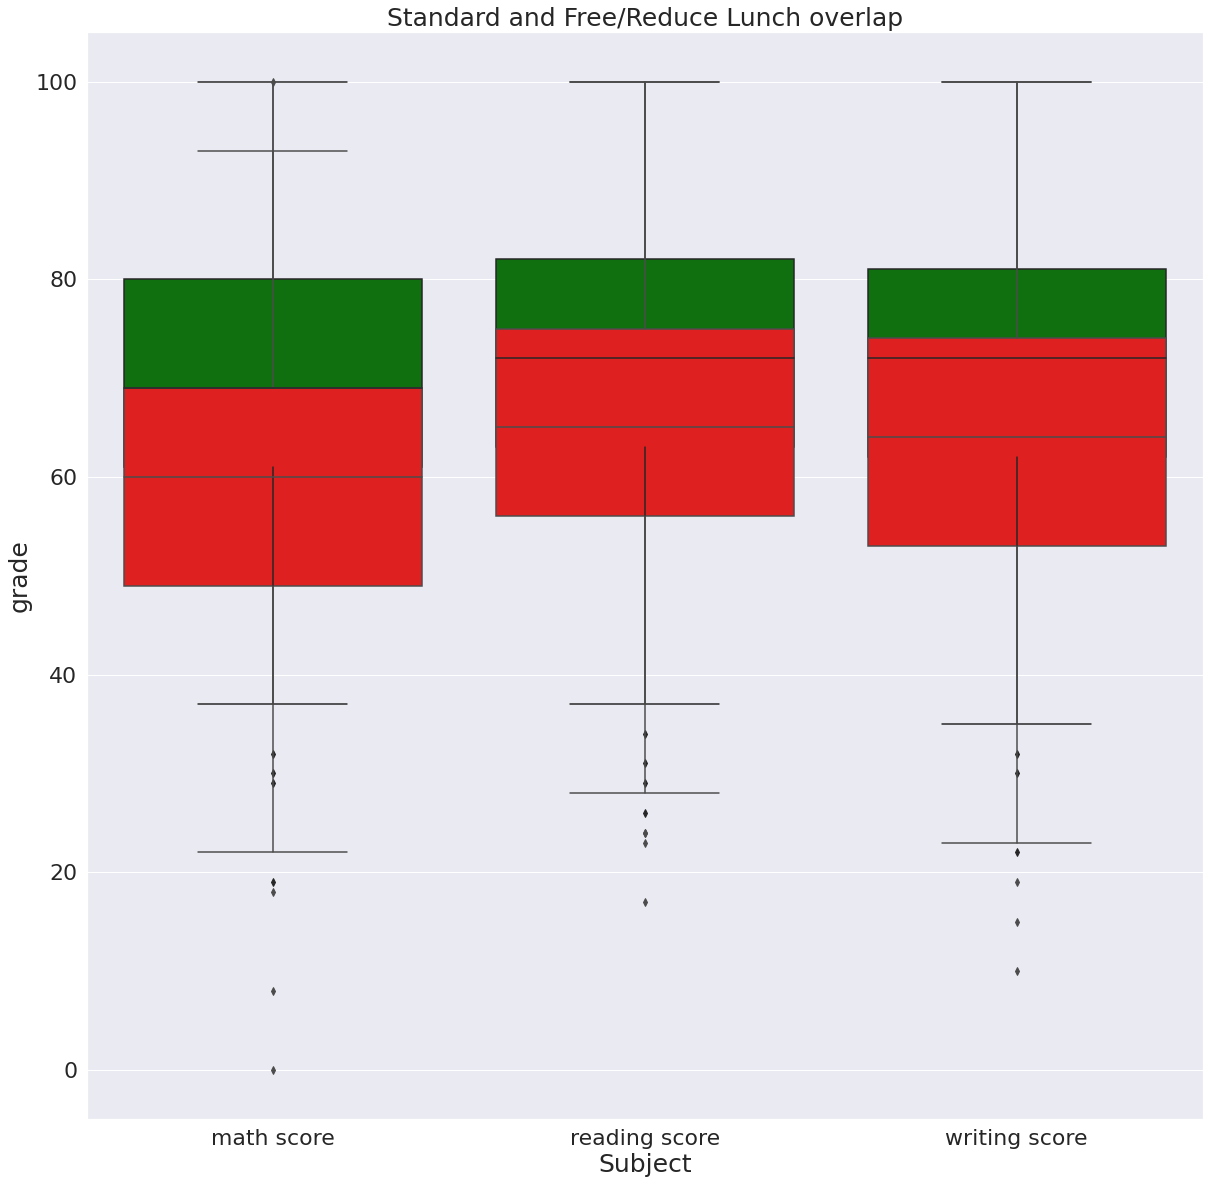

In [13]:
with plt.style.context('Solarize_Light2'):
    sns.set(font_scale = 2)
    plt.figure(figsize=(20,20))
    plt.title('Standard and Free/Reduce Lunch overlap',fontdict={'fontsize': 25})
    
    sns.boxplot(data = standardlunch, color = 'green').set_ylabel('grade',fontsize = 25)#standard lunch grades 
    sns.boxplot(data = freelunch, color = 'red').set_xlabel('Subject', fontsize = 25)   #free/reduce grades

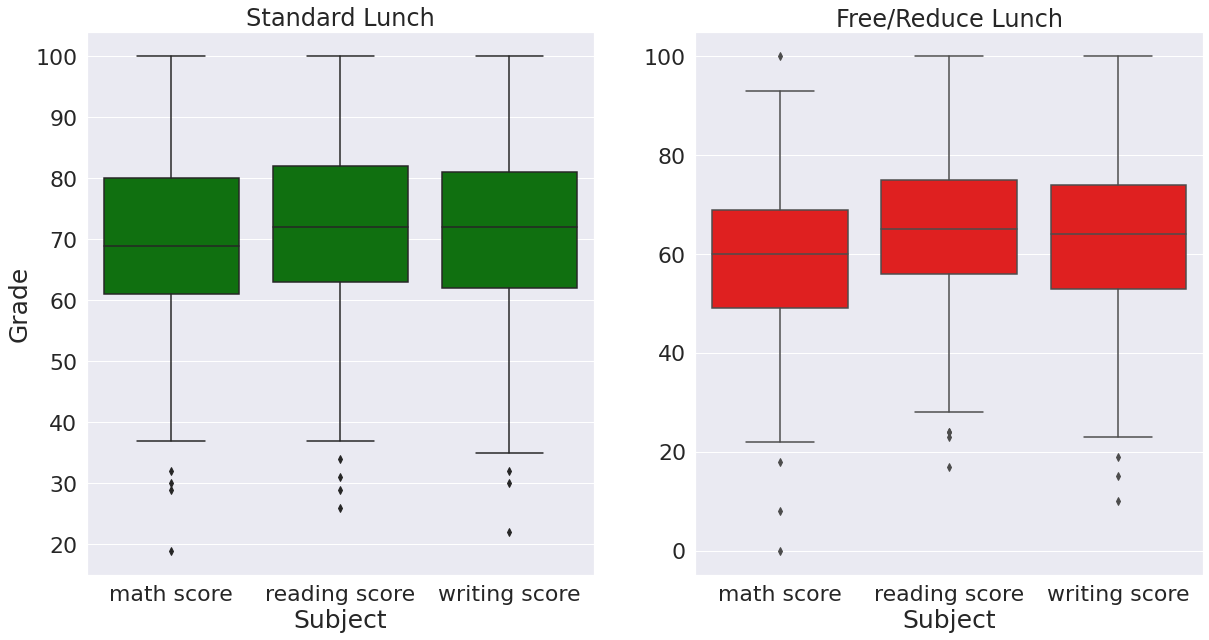

In [14]:
# subplot of the two subjects graphed seperatedly

with plt.style.context('Solarize_Light2'):
    sns.set(font_scale = 2)
    plt.figure(figsize=(20,10))

    plt.subplot(1, 2, 1)
    g1 =  sns.boxplot(data = standardlunch, color = 'green')
    g1.set_ylabel('Grade',fontsize = 25)
    g1.set_xlabel('Subject',fontsize = 25)
    plt.title('Standard Lunch')
    
    plt.subplot(1, 2, 2)
    r1 = sns.boxplot(data = freelunch, color = 'red')
    r1.set_xlabel('Subject',fontsize = 25)
    plt.title('Free/Reduce Lunch')

## Grade vs Lunch Box Plots

The overlapping box plot visualizes the differences in grades recorded, given their lunch status. This is just to show how the grades compare to each other, as it's fair to assume that the students is given the same items for lunchs and arent skipping lunch. The two supplot of box plot are to the graph seperate.


## Further Analysis

We can repeat the same process as above with the other features and plot. We can also do an analysis on grouping multiple features and seeing a further breakdown of how the students perform.

In [15]:
# data.set_index('parental level of education',inplace= True)
# data.head()

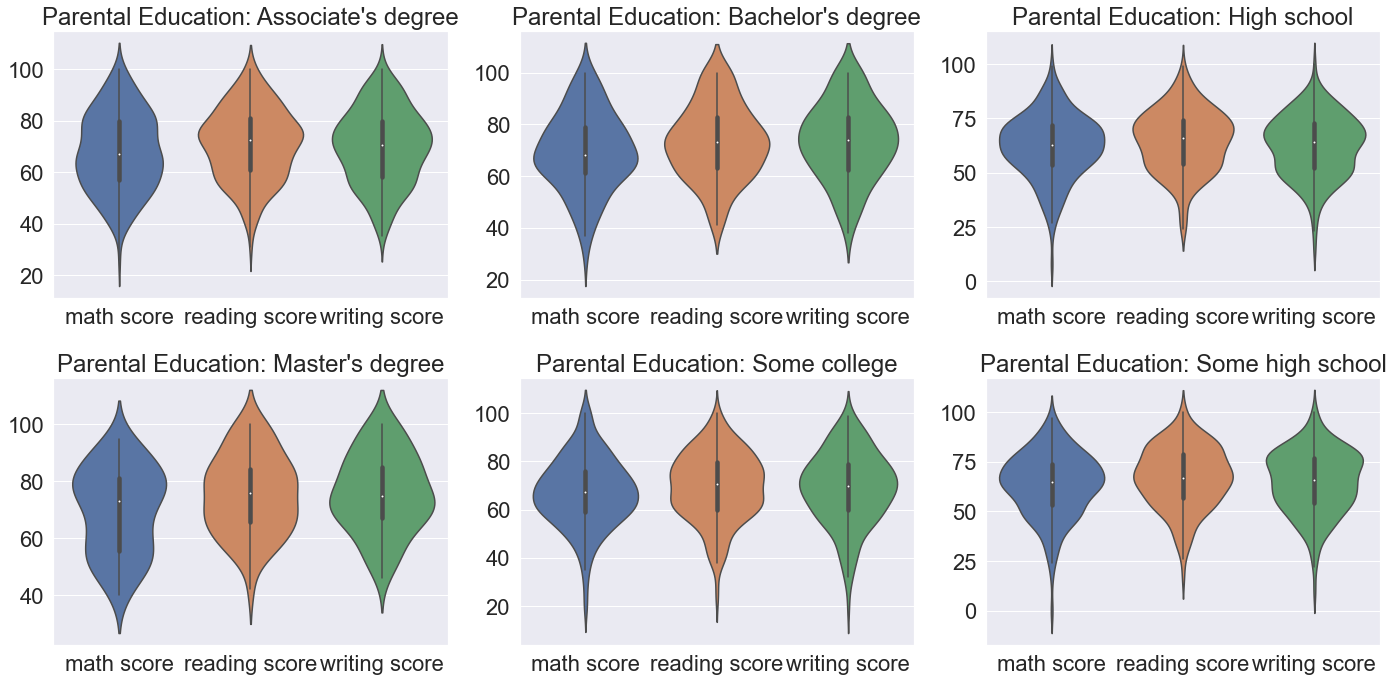

In [16]:
data.set_index('parental level of education',inplace = True)
size = len(list(data.groupby('parental level of education'))) 
c = 1
sns.set(font_scale = 2) # sets the font size
plt.figure(figsize=(20,10)) 

for parent, df_parents in data.groupby('parental level of education'):
    plt.subplot(int(size/3),int(size/2), c)
    plt.tight_layout()
    # do something to df_region
    df_parents = df_parents.drop(columns= ['gender','race/ethnicity','test preparation course'])
    ax = sns.violinplot(data = df_parents)
    ax.title.set_text('Parental Education: ' + str(parent).capitalize())
    c += 1 #moves the subplot coordinates

## Parental Education Violin Plot

Choosing violin plots over the box plot for a little more information. We can see here that with the violin plot we have the distribution of grades with the curves. In the Master's degree graph, the math scores are showing two peaks. One peak is around 50, and the second is just above 80. The violin plot helps us quickly see how the grades are distributed. One interesting thing we can notice is that in the Master's degree graph, we see that the distrubution of grades are tighter, with less outliers than the rest. 

In [49]:
# data.reset_index(inplace=True)
# data.set_index('gender',inplace=True)
#We can start to shows graphs with multiple features. 
# gender = data.groupby(['gender','parental level of education']).agg({'math score': ['mean'], 'reading score': ['mean'],'writing score':['mean']})
data.head()

,parental level of education,gender,race/ethnicity,test preparation course,math score,reading score,writing score
0,bachelor's degree,female,group B,none,72,72,74
1,some college,female,group C,completed,69,90,88
2,master's degree,female,group B,none,90,95,93
3,associate's degree,male,group A,none,47,57,44
4,some college,male,group C,none,76,78,75


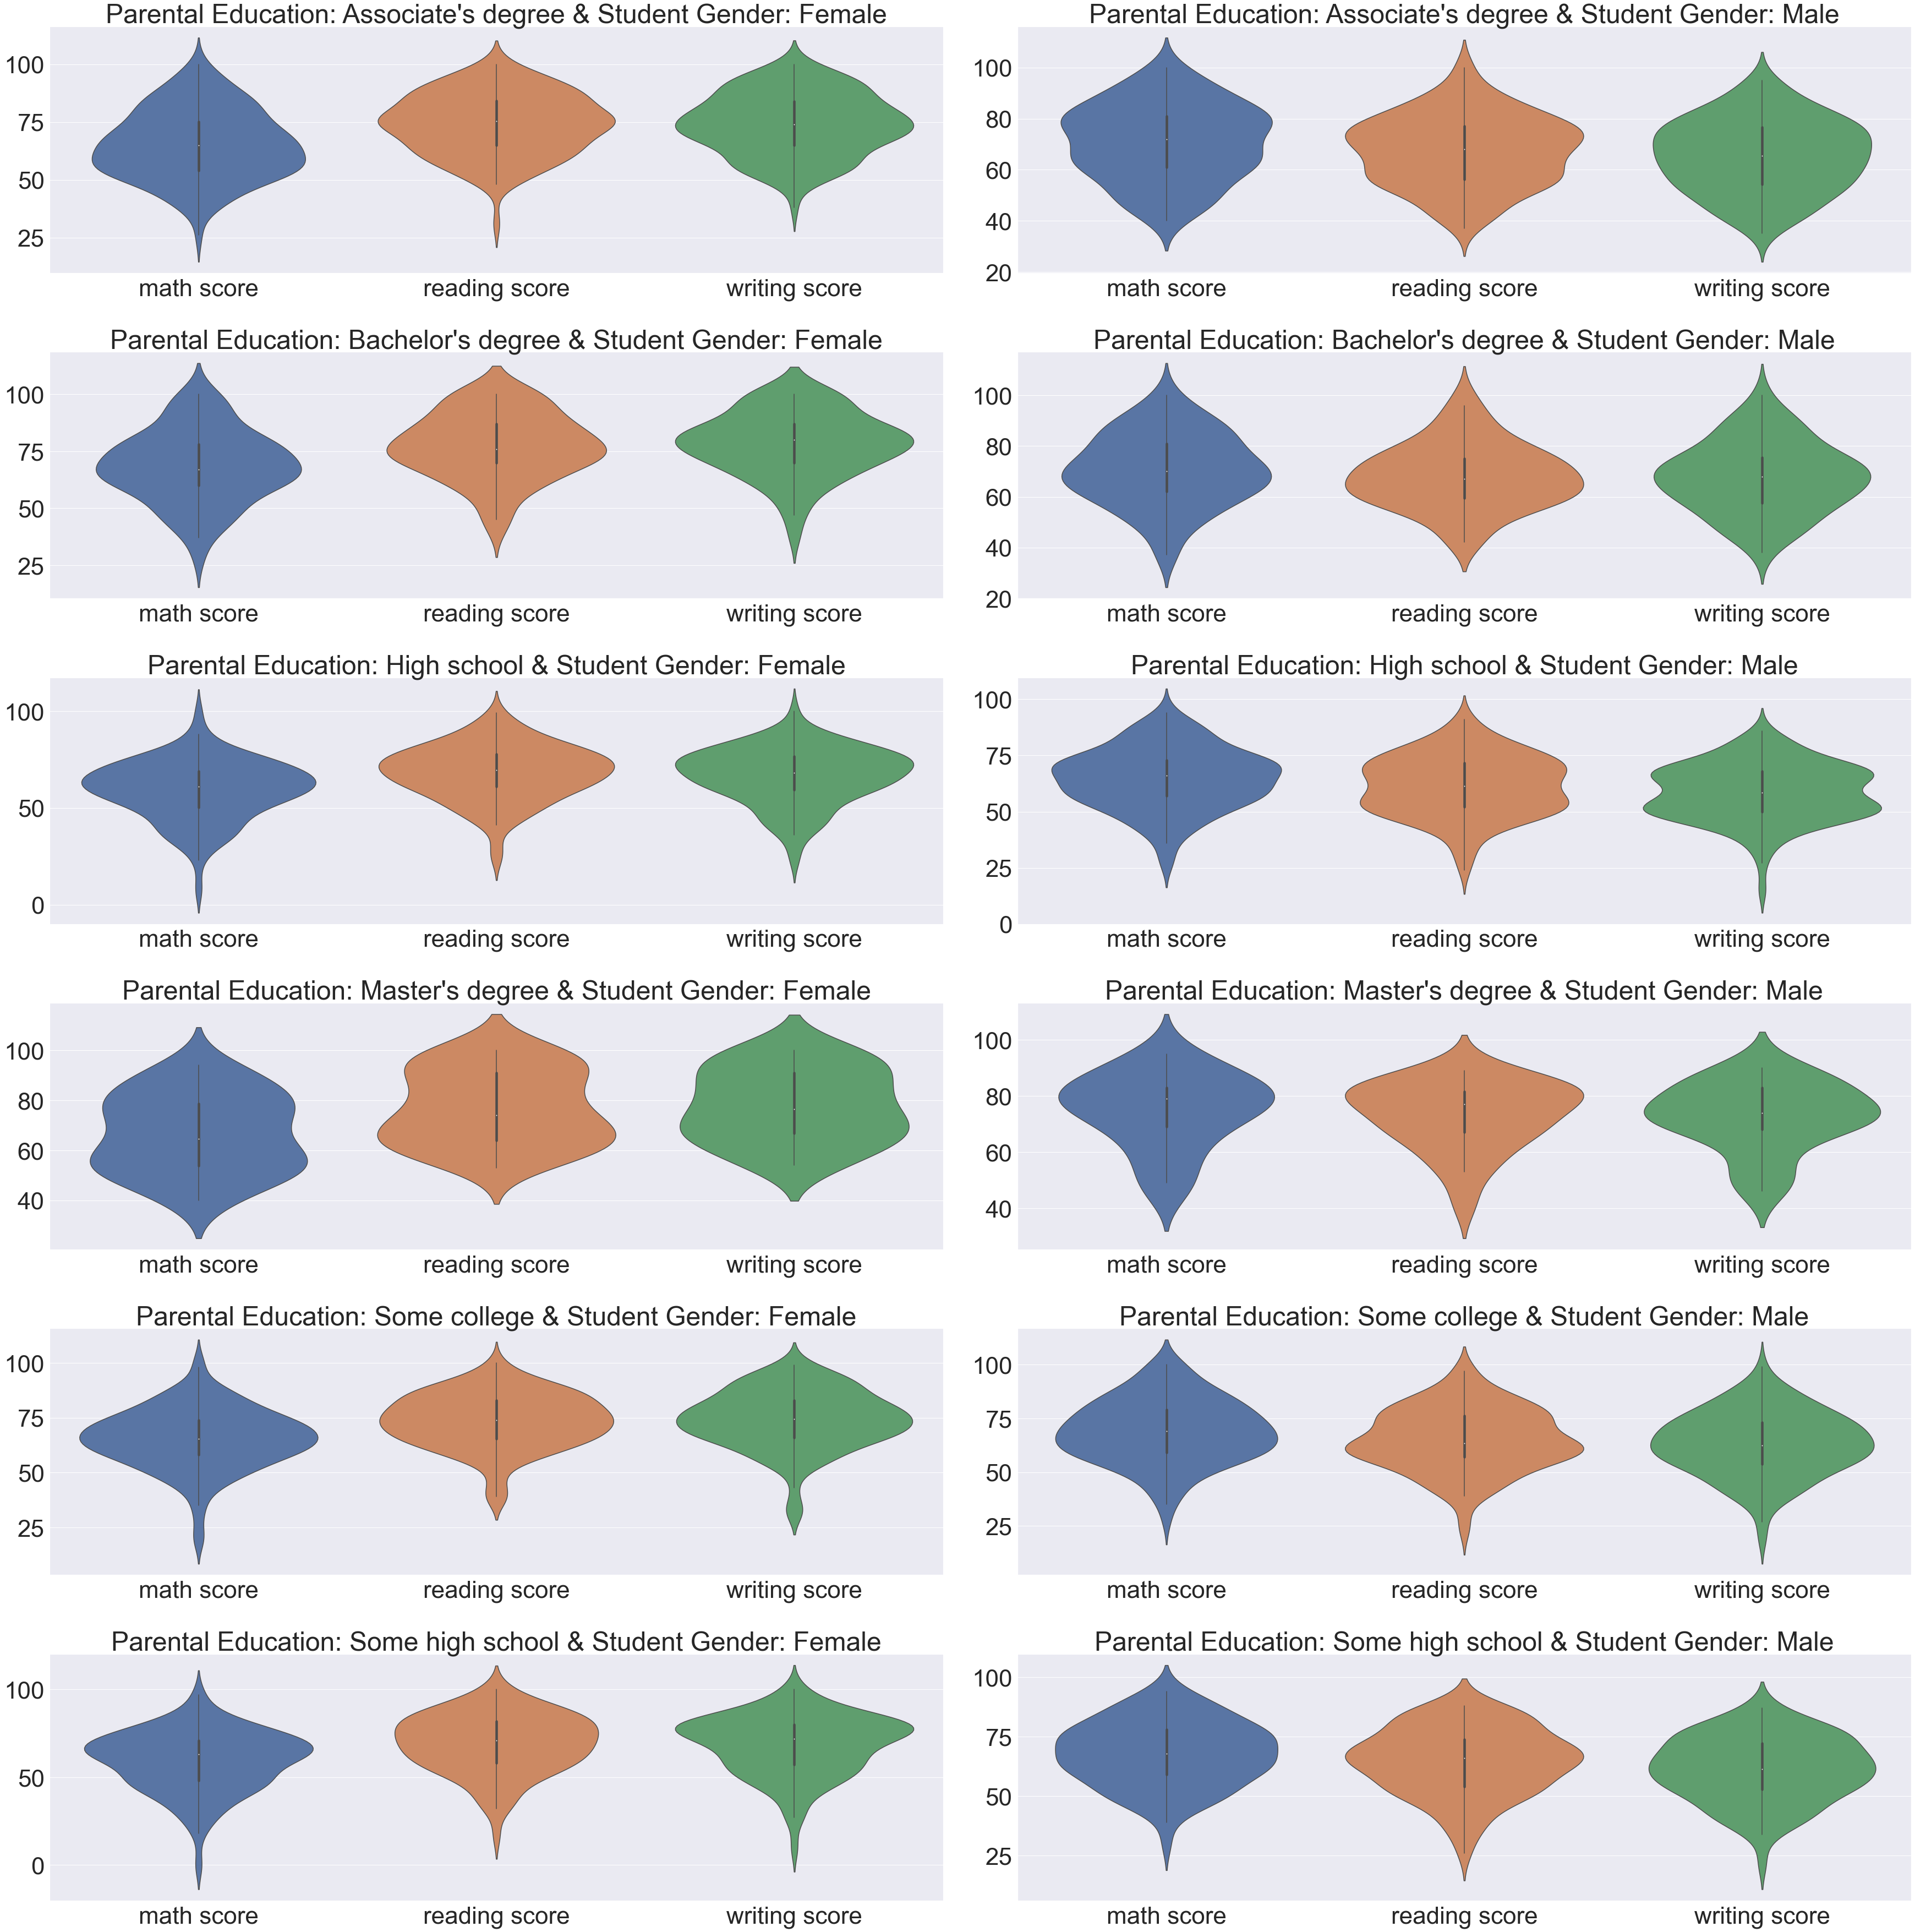

In [89]:
# data.set_index('parental level of education',inplace = True)
size = len(list(data.groupby(['parental level of education','gender']))) 
c = 1
sns.set(font_scale = 4) # sets the font size
plt.figure(figsize=(50,50)) 

for edu_gender, df in data.groupby(['parental level of education','gender']):
    plt.subplot(int(size/2),int(size/6), c)
    plt.tight_layout()
    # do something to df_region
    df = df.drop(columns= ['race/ethnicity','test preparation course'])
    ax = sns.violinplot(data = df)
    ax.title.set_text('Parental Education: ' + str(edu_gender[0]).capitalize() + ' & Student Gender: ' + str(edu_gender[1].capitalize()))
    c += 1 #moves the subplot coordinates

With the above graph, we incorporate the genders of the student and their parent's education. This allow us to see if there is any influence in their grades, given their parents background. One thing to point out is that the male students have better grades in math when compared to their reading and writing grades. The opposite is true for the female students. 

An interesting thing I notice is that when comparing the graph of the parental master degree, we can see that the female students - for each subject - is a bimodal distribution. It is interesting that female grades are more dispersed, on the other hand, the males are more concentrated near the top. 

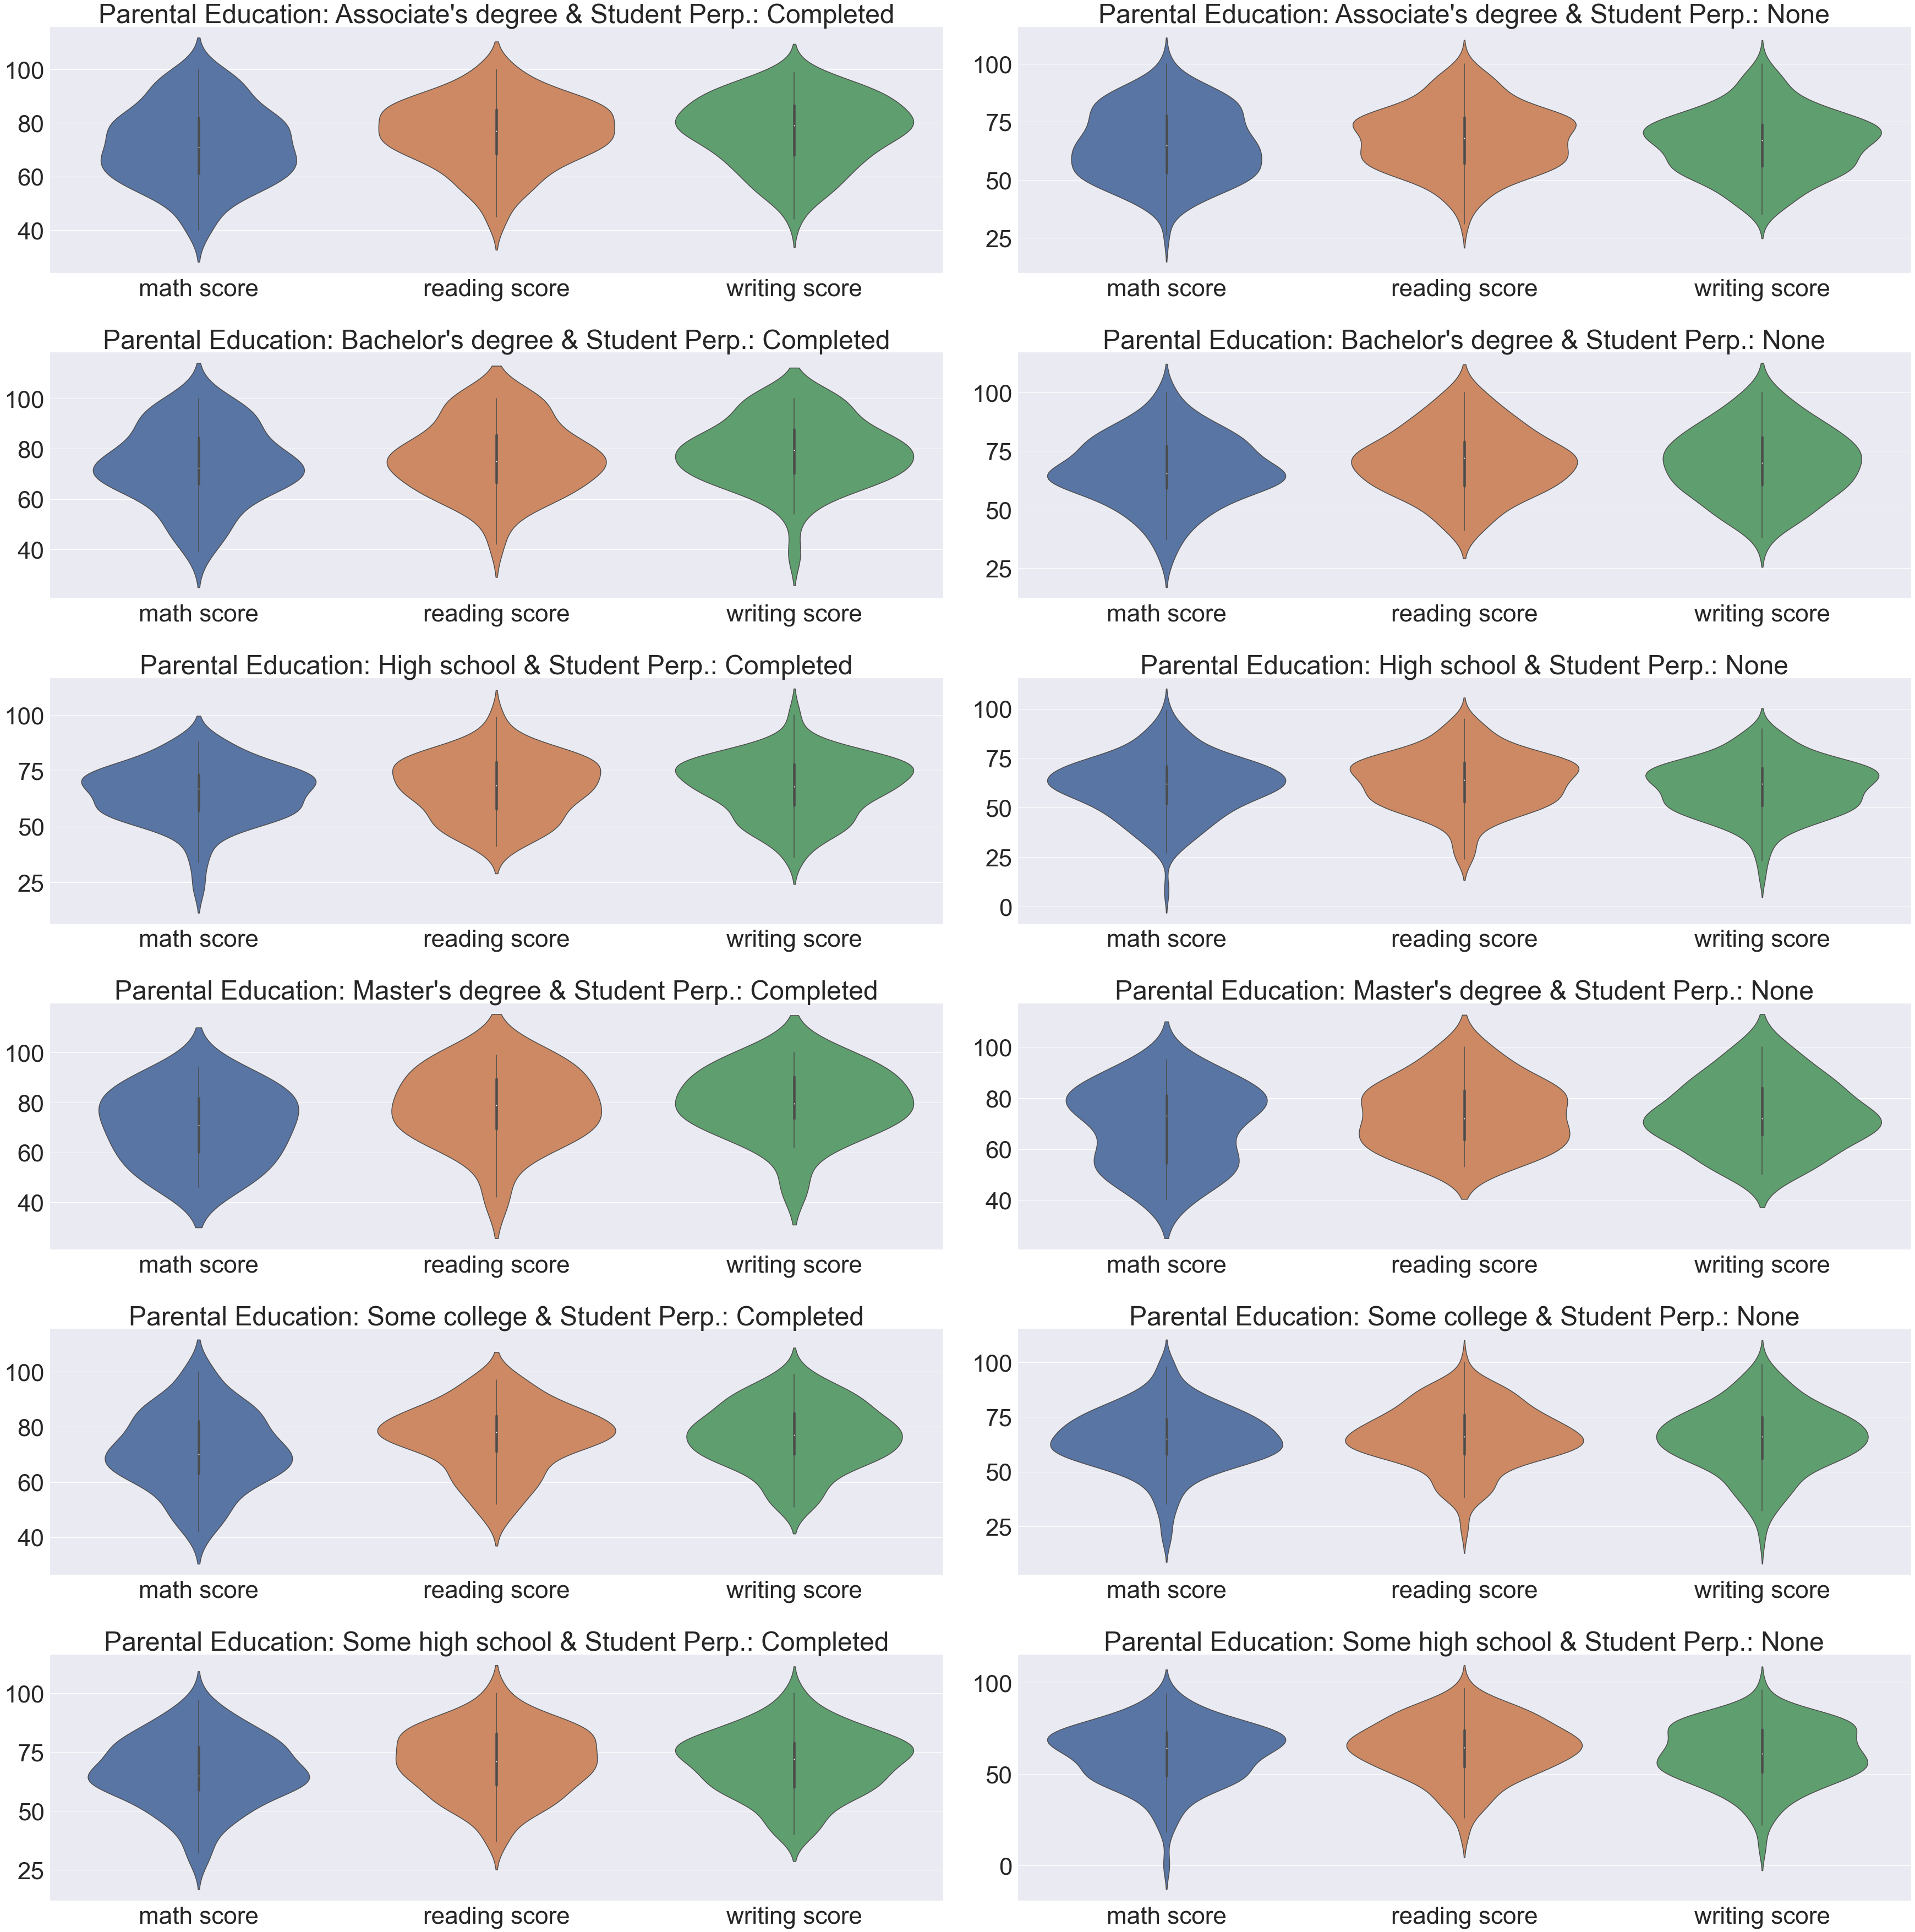

In [94]:
# data.set_index('parental level of education',inplace = True)
group = data.groupby(['parental level of education','test preparation course'])
size = len(list(group)) 
c = 1
sns.set(font_scale = 4) # sets the font size
plt.figure(figsize=(50,50)) 

for edu_prep, df in group:
    plt.subplot(int(size/2), int(size/6), c)
    plt.tight_layout()
    # do something to df_region
    df = df.drop(columns= ['race/ethnicity','gender'])
    ax = sns.violinplot(data = df)
    ax.title.set_text('Parental Education: ' + str(edu_prep[0]).capitalize() + ' & Student Perp.: ' + str(edu_prep[1].capitalize()))
    c += 1 #moves the subplot coordinates

It's no surprised that students that took/completed the Test Preparation Course, had higher scores. In most graphs we notice that even the lowest scoring student, who completed the test prep course, out performed their counterparts that did not complete the test prep course.

For a more something a bit more simplier, we can just graph the prep course complete and see the grade distribution

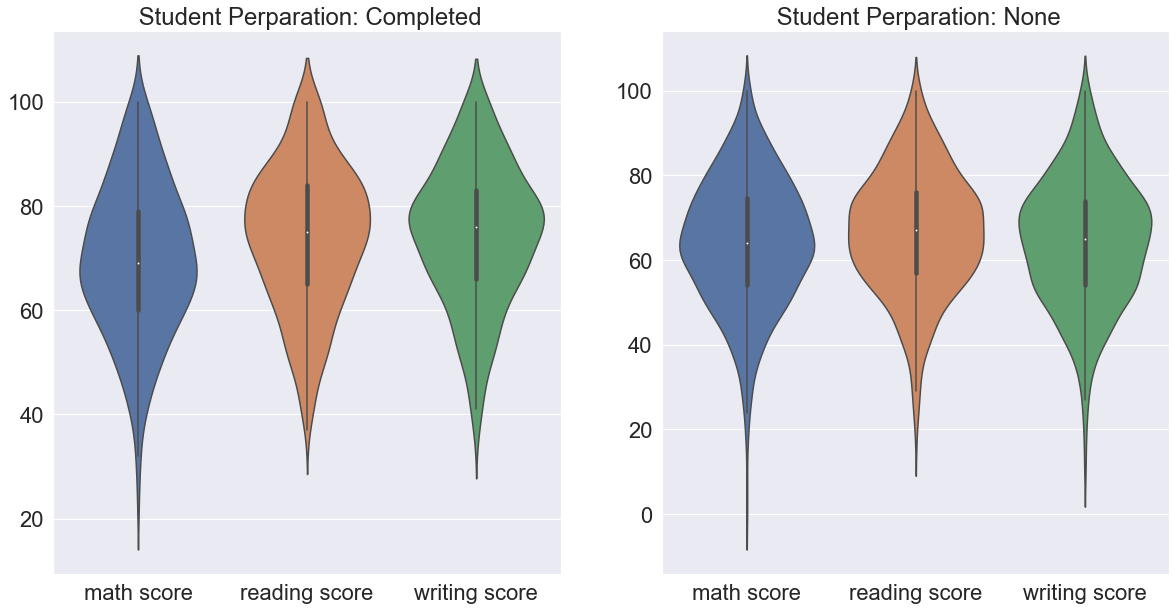

In [106]:
group = data.groupby(['test preparation course'])
size = len(list(group)) 
c = 1
sns.set(font_scale = 2) # sets the font size
plt.figure(figsize=(20,10)) 

for prep, df in group:
    plt.subplot(1, 2, c)
#     plt.tight_layout()
    # do something to df_region
    df = df.drop(columns= ['parental level of education','race/ethnicity','gender'])
    ax = sns.violinplot(data = df)
    ax.title.set_text(' Student Perparation: ' + str(prep.capitalize()))
    c += 1 #moves the subplot coordinates

These two graph just show where the student completed the test preparation course or not. The clear result is that the student performed better with the completion of the course. 

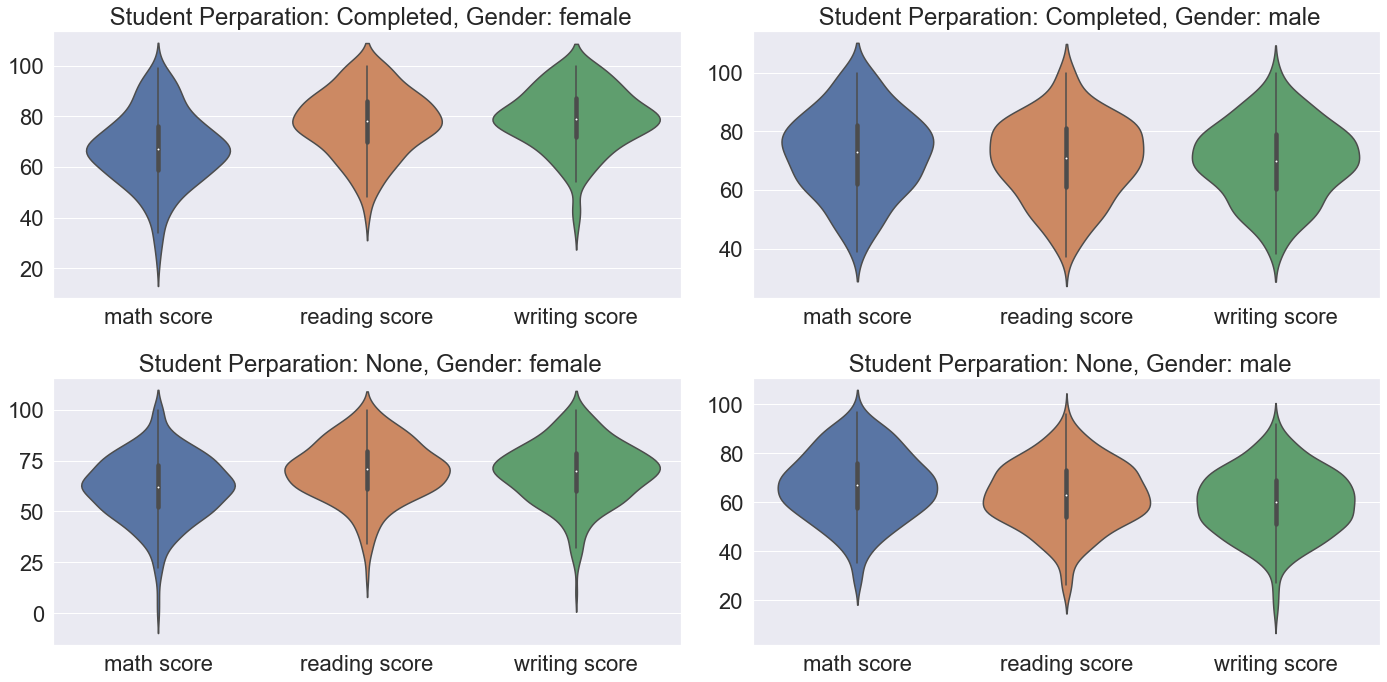

In [111]:
group = data.groupby(['test preparation course','gender'])
size = len(list(group)) 
c = 1
sns.set(font_scale = 2) # sets the font size
plt.figure(figsize=(20,10)) 

for prep_gender, df in group:
    plt.subplot(2, 2, c)
    plt.tight_layout()
    # do something to df_region
    df = df.drop(columns= ['parental level of education','race/ethnicity'])
    ax = sns.violinplot(data = df)
    ax.title.set_text(' Student Perparation: ' + str(prep_gender[0].capitalize()) + ', Gender: '+ str(prep_gender[1]))
    c += 1 #moves the subplot coordinates

The final grouping we can do is with preparation course completion and gender. We can clearly see that the students perform better when completing the prep course.

In [90]:
data.head()

,parental level of education,gender,race/ethnicity,test preparation course,math score,reading score,writing score
0,bachelor's degree,female,group B,none,72,72,74
1,some college,female,group C,completed,69,90,88
2,master's degree,female,group B,none,90,95,93
3,associate's degree,male,group A,none,47,57,44
4,some college,male,group C,none,76,78,75


## Conclusion 

With this analysis we identified clear indicators that help the student perform better. The completion of the test preparation course is the number one way to help a student score better. Regardless of the background, there is no disputing that fact. We see that in the graphs with gender, and the previous groups of graph with parental degrees, in both sets, if the student took the preparation course, the grade was better. The opposite is true, the student that didn't take the preparation didnt do as well as their counterparts. 

The other indicator is having a parent with higher education completion. The influence of their parents having a higher degress can have its advantages. Anywhere from having someone in the house that can help guide them in Homework, or how to study for exams. This can play a huge role, especially when compared to student that may not have that in their household. While it's not as powerful as taking the test preparation, its not something we can dismiss.

We can also assume that each student each lunch, from either being in a free/reduce lunch program or standard. These program backed by the government help student not have the distraction of hunger when taking exams or being in class. Ensuring that they are in the best possible state for school. Hence why we dont consider their lunch status to affect their scores. 

We didnt see much of the enthnicity to avoid an stereotypes from any groups. This was a complete analysis in the a student performace and not their background. 